<a href="https://colab.research.google.com/github/vishnuaswanth/ML_projects/blob/main/M2_MP1_NB_LinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Learning
## A program by IIT Madras and TalentSprint
### Module 2 Mini Project: Sentiment Analysis using linear classifiers and unsupervised clustering.

## Learning Objectives

At the end of the mini project, you will be able to -

* use a real world dataset.
* undertake several important steps like cleaning the data and normalizing the data points.
* do sentiment classification.
* compare between different types of classification methods and their pros and cons.
* compare between supervised and unsupervised (clustering) techniques.

### Goal of the project
The goal of this project is to train linear classification models that can recognize the sentiment of the reviewer. In this project we will be dealing with only positive and negative sentiments (binary classification).

**Disclaimer**:
There are multiple ways to solve this problem, as there is no unique formula to solve.
This is just one such approach.


**Packages used:**  
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` and `Seaborn` for visualization
*  `sklearn` for the metrics and pre-processing
* `scipy` for helper functions required at various stages of the project.
* `warnings` is used to supress warnings from different libraries used in the project.

### Importing the packages

In [ ]:
# Importing standard libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import scipy
import math
import random

# Importing linear classification algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

# Importing the clustering algorithms
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Importing preprocessing functions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Importing metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc


# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

### Downloading a dataset containing amazon review information along with ratings

In [ ]:
#@title Download Dataset
!wget https://cdn.iisc.talentsprint.com/ADSMI/Datasets/amazon_reviews.zip
!unzip "amazon_reviews.zip"

--2024-04-07 04:42:23--  https://cdn.iisc.talentsprint.com/ADSMI/Datasets/amazon_reviews.zip
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29949034 (29M) [application/zip]
Saving to: ‘amazon_reviews.zip’

amazon_reviews.zip  100%[===================>]  28.56M  6.30MB/s    in 4.5s    

2024-04-07 04:42:29 (6.30 MB/s) - ‘amazon_reviews.zip’ saved [29949034/29949034]

Archive:  amazon_reviews.zip
  inflating: amazon_reviews.csv      


## How does the dataset look like?
Lets use a standard dataset from Amazon which contains reviews and ratings from the customer. The original dataset has three features: name(name of the products), review(Customer reviews of the products), and rating(rating of the customer of a product ranging from 1 to 5). The review column will be the input column and the rating column will be used to understand the sentiments of the review. Here are some important data preprocessing steps:
The dataset has about 183,500 rows of data. There are 1147 null values which will be removed.
As the dataset is pretty big, it takes a lot of time to run some machine learning algorithms. We will use 30% of the data in this project which is still 54,000+ data points! The sample will be representative of the whole dataset.
If the rating is 1 and 2 that will be considered a negative review. And if the review is 3, 4, and 5, the review will be considered as a  positive review. We add a new column named ‘sentiments’ to the dataset that will use 1 for the positive reviews and 0 for the negative reviews. We read and display the contents of the dataset down below.

**Exercise 1**: Load the data and perform the following (1 points)
- Exploratory Data Analysis
- Preprocessing


**Hints:**

- checking for the number of rows and columns
- summary of the dataset
- statistical description of the features
- check for the duplicate values
- Show the top 5 and the last 5 rows of the data
- check for the null values, and handle them if *any*

summary:
<bound method DataFrame.info of                                                      name  \
0                                Planetwise Flannel Wipes   
1                                   Planetwise Wipe Pouch   
2                     Annas Dream Full Quilt with 2 Shams   
3       Stop Pacifier Sucking without tears with Thumb...   
4       Stop Pacifier Sucking without tears with Thumb...   
...                                                   ...   
183526  Baby Teething Necklace for Mom Pretty Donut Sh...   
183527  Baby Teething Necklace for Mom Pretty Donut Sh...   
183528   Abstract 2 PK Baby / Toddler Training Cup (Pink)   
183529  Baby Food Freezer Tray - Bacteria Resistant, B...   
183530  Best 2 Pack Baby Car Shade for Kids - Window S...   

                                                   review  rating  sentiments  
0       These flannel wipes are OK, but in my opinion ...       3           1  
1       it came early and was not disappointed. i love...       5 

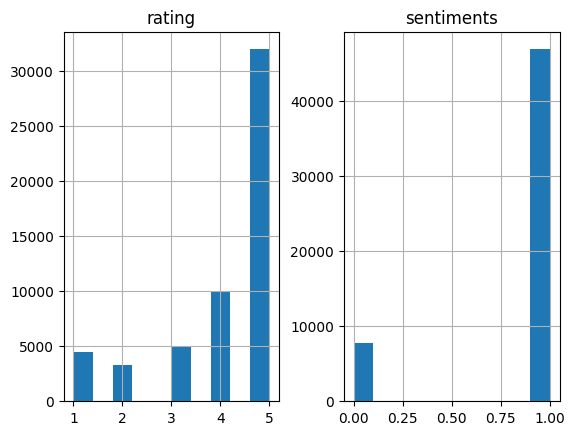

In [ ]:
df = pd.read_csv("/content/amazon_reviews.csv")
df['sentiments'] = df["rating"].apply(lambda x: 1 if int(x) >= 3 else 0)
print("summary:")
print(df.info)
print(f"{'='*100}")
print("description:")
print(df.describe())
print(f"{'='*100}")
print("Null values:")
print(df.isnull().sum())
print("Null value rows are deleted")
df = df.dropna(axis=0)
print(df.isnull().sum())
print(f"{'='*100}")
print("duplicate values",df.duplicated(subset=["review", "rating"]).sum())
print(df[df.duplicated(subset=["review", "rating"], keep=False)])
df = df.drop_duplicates(subset=["review", "rating"])
print("Total duplicate values after removing",df.duplicated(subset=["review", "rating"]).sum())
print(df.shape)
print(f"{'='*100}")

df = df.sample(frac=0.3, random_state=0)
print(df.info)
print(f"{'='*100}")


df.hist()
y = df[['sentiments']].values
X = df[['review']].values
print(X.shape, y.shape)
X = X.flatten()


For Exercises, 2 to 9, use sklearn library to model, fit, train and see the metrics [Accuracy and F1_score]. Writing your own custom functions is  not required.


1.   **Exercise 1**: Load the data and perform the following : (2 point)
      - Exploratory Data Analysis
      - Preprocessing
2.   **Exercise 2**: **Implementation using K-Nearest Neighbor (KNN) Classifier**:  (2 point)

3.   **Exercise 3**: **Implementation using Support Vector Machines (SVM) Classifier**:  
      - First Reduce the features using PCA
      - use Hard-Margin Classifier
      - use Soft-Margin Classifier
      - use Kernel SVM Classifier
4.   **Exercise 4**: **Implementation using Decision Trees**:  (2 point)
5.   **Exercise 5**: **Implementation using Ensemble Classifier**:  (1 point)
      - use LogisticRegression, KNN, SVM, and VotingClassifier as the weak classifiers

6.   **Exercise 6**: **Implementation using Clustering**: (2 point)
      - k Means Clustering
      
7.   **Exercise 7**: **Test your own sentence**: (1 point)
      - Input your sentences ( One for positive and negative each)
      - Print the output sentiment.

**Sample code using Logistic Regression**

The logistic function, more popularly called the sigmoid function was to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment.

It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$\frac{1}{ (1 + e^{-value})}$

Where $e$ is the base of the natural logarithms and value is the actual numerical value that you want to transform. Below is a plot of the numbers between $-5$ and $5$ transformed into the range $0$ and $1$ using the logistic function.



In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110, stopwords = set(STOPWORDS))

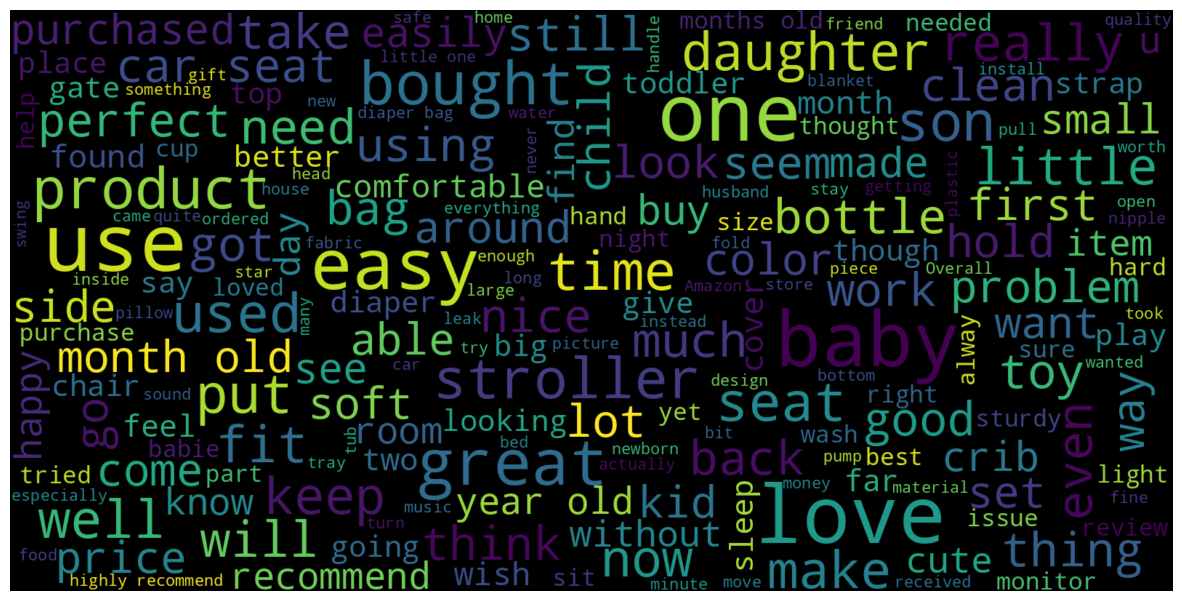

In [ ]:
positive_indices = np.where(y == 1)[0]
positive_reviews = ' '.join(X[positive_indices])

plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(positive_reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

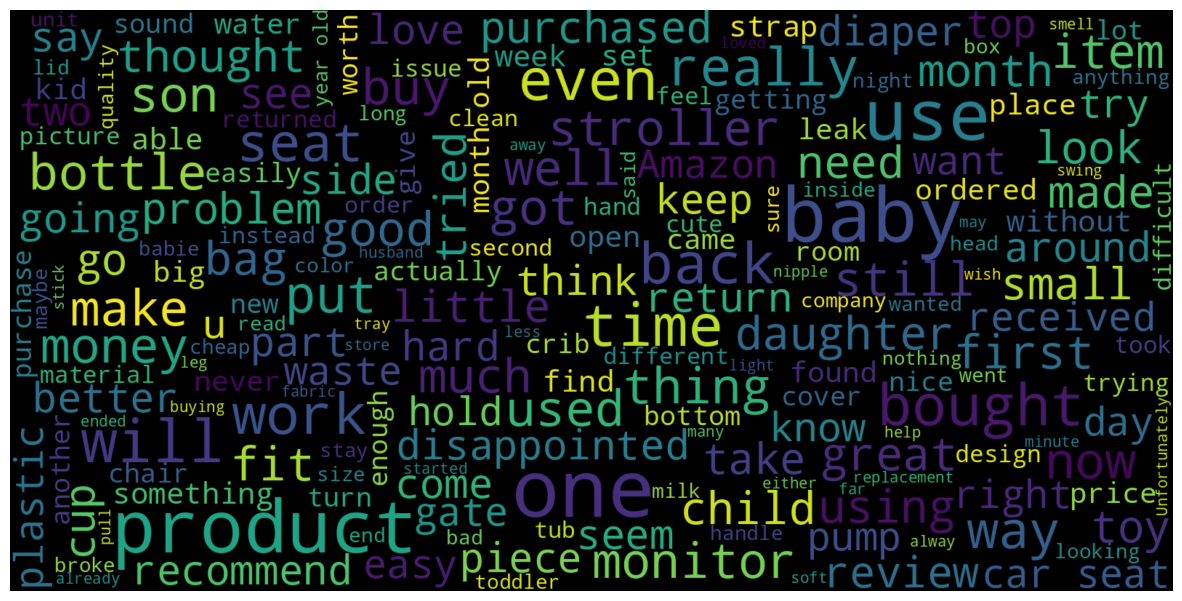

In [ ]:
negative_indices = np.where(y == 0)[0]
negative_reviews = ' '.join(X[negative_indices])

plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(negative_reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Transform reviews to transformer vectors
tfid_vectorizer = TfidfVectorizer(max_features=500, ngram_range = (2,2), stop_words="english")
X_tfid_vectorized = tfid_vectorizer.fit_transform(X)
print(X_tfid_vectorized.shape)

(54701, 500)


In [ ]:
X_train_vec, X_test_vec, y_train, y_test= train_test_split(X_tfid_vectorized, y, train_size=0.45, random_state=2)
print(X_train_vec.shape,y_train.shape)

(24615, 500) (24615, 1)


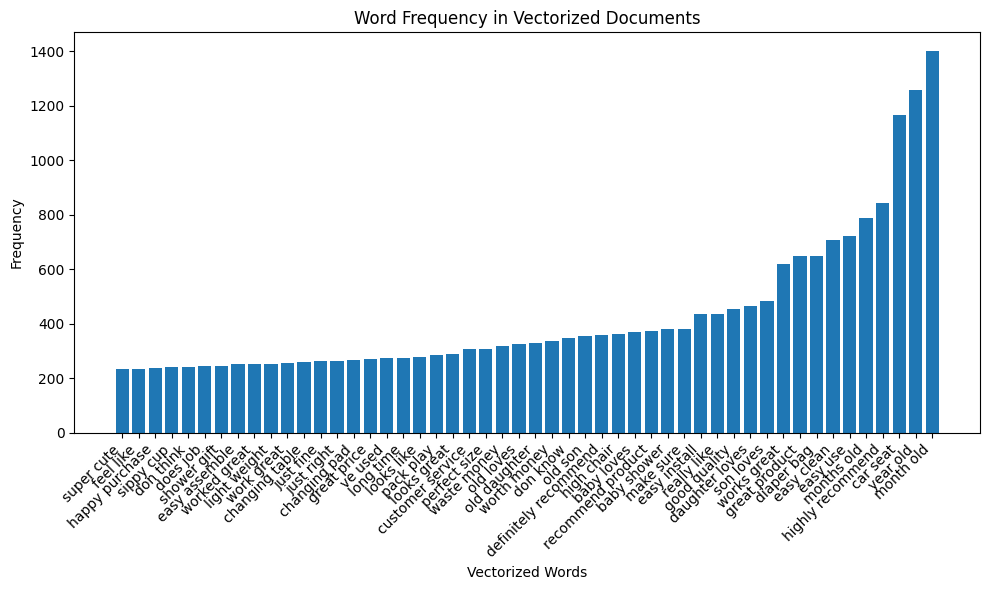

In [ ]:
vectorized_words = tfid_vectorizer.get_feature_names_out()
word_frequencies = np.sum(X_tfid_vectorized.toarray(), axis=0)
sortedIndex = np.argsort(word_frequencies)[-50:]
words = [vectorized_words[i] for i in sortedIndex]
plt.figure(figsize=(10, 6))
plt.bar(words, word_frequencies[sortedIndex])
plt.xlabel('Vectorized Words')
plt.ylabel('Frequency')
plt.title('Word Frequency in Vectorized Documents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
def createConfusionMatrix(actual, pred):
  cm = confusion_matrix(actual,pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Negative', "Positive"])
  cm_display.plot()
  plt.grid(visible=None)
  plt.show()

In [ ]:
  def generate_roc_curve(pred_prob, label='model'):
    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

    # roc curve for tpr = fpr
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=label)

    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

    area = auc(fpr1, tpr1)
    # title
    plt.title(f'ROC curve :{ area }')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show();

Accuracy of the sentiment classification using the Logistic Regression based classifier:  0.8724655986172971
F1 Score for sentiment classification using the Logistic Regression based classifier:  0.9301690720148508


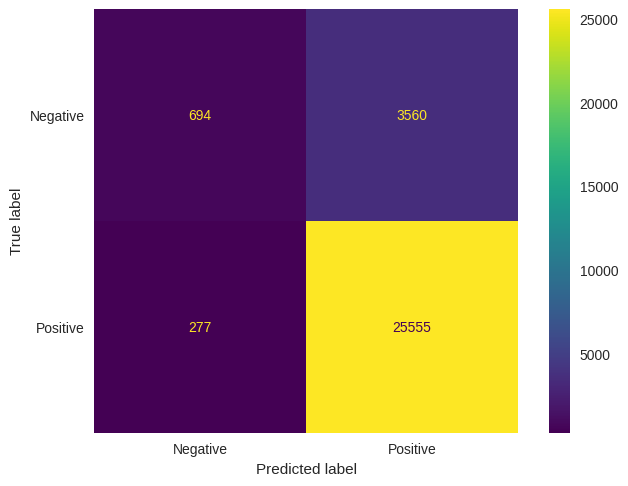

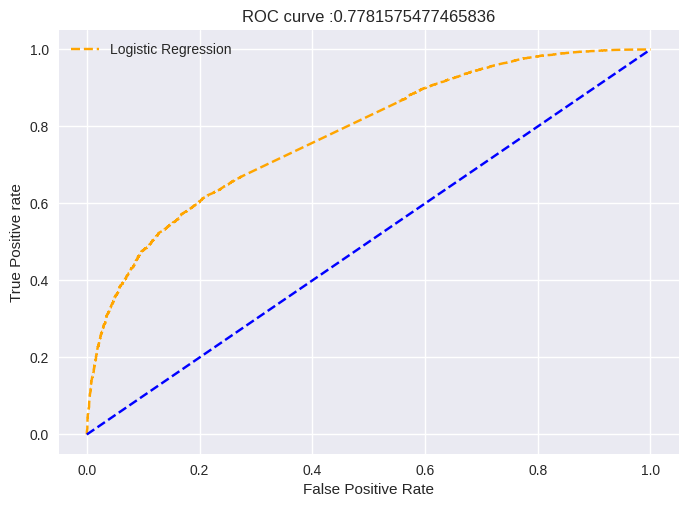

In [ ]:
# Logistic regression model is defined
logistic_regression = LogisticRegression()

# Training the logistic regression classifier
logistic_regression.fit(X_train_vec, y_train)

# Calculating accuracy on the logistic regression classifier
# The accuracy is within 0 and 1 in this snippet
lr_score = logistic_regression.score(X_test_vec, y_test)
print("Accuracy of the sentiment classification using the Logistic Regression based classifier: ", lr_score)

# Predicting on the test set
y_pred_lr = logistic_regression.predict(X_test_vec)



# F1 score calculation
lr_f1_score = f1_score(y_test, y_pred_lr)

print ("F1 Score for sentiment classification using the Logistic Regression based classifier: ", lr_f1_score)
createConfusionMatrix(y_test, y_pred_lr)
pred_prob_lr = logistic_regression.predict_proba(X_test_vec)
generate_roc_curve(pred_prob_lr, 'Logistic Regression')


**Exercise 1**: Load the data and perform the following: (2 point)

- Exploratory Data Analysis (Use Pandas, Seaborn)
- Preprocessing (Use Pandas)

**Hints:**

- checking for the number of rows and columns
- summary of the dataset
- statistical description of the features
- check for the duplicate values
- Show the top 5 and the last 5 rows of the data
- check for the null values, and handle them if *any*

In [ ]:
# YOUR CODE(s) HERE

(182384, 10)

**Exercise 2**: **Implementation using K-Nearest Neighbor (KNN) Classifier**:  (2 point)


[Refer to the Logistic Regression Example in the above cells]

- Define the KNN classifier with Number of neighbours=5 using sklearn's **KNeighborsClassifier** function
- Train the KNN classifier
- Predict the test set
- Calculate accuracy on the KNN classifier
- Compute the F1 score

In [ ]:
# KNN classifier with Number of neighbours=5
knn_clf = KNeighborsClassifier(5)
knn_clf.fit(X_train_vec, y_train)
knn_score = knn_clf.score(X_test_vec, y_test)
print("Accuracy of the sentiment classification using the K-Nearest Neighbor (KNN) Classifier: ", knn_score)

# Predicting on the test set
y_pred_knn = knn_clf.predict(X_test_vec)

# F1 score calculation
knn_f1_score = f1_score(y_test, y_pred_knn)

print ("F1 Score for sentiment classification using the K-Nearest Neighbor (KNN) Classifier: ", knn_f1_score)


Accuracy of the sentiment classification using the K-Nearest Neighbor (KNN) Classifier:  0.8470717277138868
F1 Score for sentiment classification using the K-Nearest Neighbor (KNN) Classifier:  0.9145415033711621


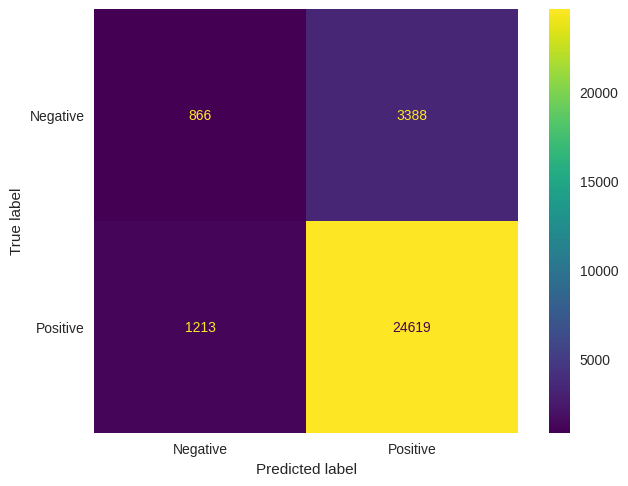

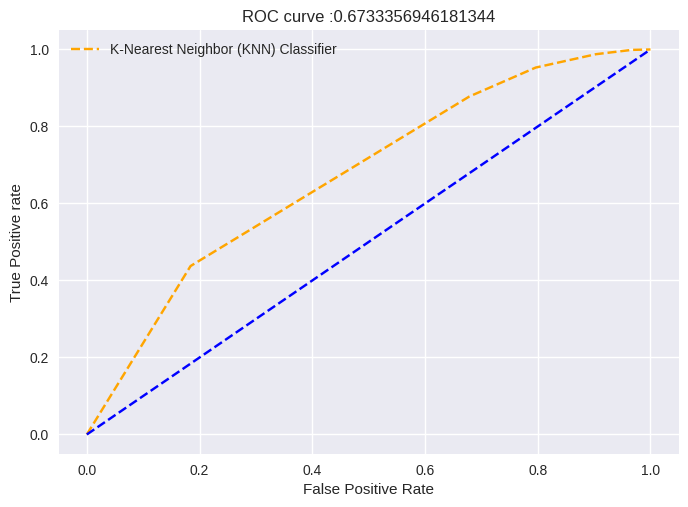

In [ ]:
createConfusionMatrix(y_test, y_pred_knn)
pred_prob_knn = knn_clf.predict_proba(X_test_vec)
generate_roc_curve(pred_prob_knn, 'K-Nearest Neighbor (KNN) Classifier')

In [ ]:
# When features are reduced using PCA
pca = PCA(n_components = 2)
X_pca_transformed= pca.fit_transform(X_tfid_vectorized.toarray())
X_pca_transformed.shape


(54701, 2)

In [ ]:
X_train_pca, X_test_pca, y_train, y_test= train_test_split(X_pca_transformed, y, train_size=0.45, random_state=2)


In [ ]:
# KNN classifier with Number of neighbours=5 used feature reduced data
knn_clf = KNeighborsClassifier(5)
knn_clf.fit(X_train_pca, y_train)
knn_score = knn_clf.score(X_test_pca, y_test)
print("Accuracy of the sentiment classification using the K-Nearest Neighbor (KNN) Classifier: ", knn_score)

# Predicting on the test set
y_pred_knn = knn_clf.predict(X_test_pca)

# F1 score calculation
knn_f1_score = f1_score(y_pred_knn, y_test)

print ("F1 Score for sentiment classification using the K-Nearest Neighbor (KNN) Classifier: ", knn_f1_score)

Accuracy of the sentiment classification using the K-Nearest Neighbor (KNN) Classifier:  0.8476310718320155
F1 Score for sentiment classification using the K-Nearest Neighbor (KNN) Classifier:  0.9165787463164405


**Exercise 3**: **Implementation using Support Vector Machines (SVM) Classifier**:  
  - First Reduce the features using PCA
  - use Hard-Margin Classifier
  - use Soft-Margin Classifier
  - use Kernel SVM Classifier



Background:
The next classifier we look into are support vector machines.

![wget](https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/linear_data.png)

While the other classifiers such as the perceptron and the logistic regression uses a similar concept of finding a boundary between two classes using a straight line, SVMs aim to maximize this boundary. Therefore, not only the SVM tries to find a boundary, it tries to find the best boundary that separates the two classes. Again, with very simple tricks the two class classification can be easily extended to a multiclass classification. The formal formulation of a SVM is,

$g(x) = w^Tx + b$, is the equation of the line we want to find with weights $w$ and a bias $b$.

Now as seen from the figure, $g(x) = k$ and $g(x) = -k$ will give two worst lines for classification as they are right at the boundary of one of the classes. We need to maximize the distance of the line from both of the classes.

Therefore,

Maximize $k$ such that :

$-w^Tx + b \geq k \: for \: d_i == 1$

$-w^Tx + b \leq k \: for \: d_i == -1$

We keep $g(x) \geq 1$ and minimize $||w||$.

We finally write the final minimization function (uses Lagrangians to come to this solution).

Minimize: $J(w, b, \alpha) = \frac{1}{2}w^Tw - \Sigma_{i=1}^{N}(\alpha_id_i(w^Tx_i + b)) + \Sigma_{i=1}^{N}(\alpha_i)$

There are multiple types of SVM. We first use the standard linear SVM and check the performance of the model. However, SVM cannot be directly used on this dataset.   

The data is too large and the normal SVM function from `sklearn` will take a lot of time to run. Therefore, we first apply a PCA based dimensionality reduction technique on the input data. This will be followed by different types of SVM techniques and the performance can be compared. Since, dimensionality reduction is applied, a slight drop in performance is expected. However, with the improvement in the time taken for training a SVM in mind, it is important we first apply PCA based dimensionality reduction.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset.Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.


**Hints**
- Define the PCA [Hint link PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) model using sklearn's **TruncatedSVD** [Hint link TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)
- Fit the training data using **model.fit**
- Reduce the dimensions of the training data using **model.transform**
- Reduce the dimensions of the testing data using **model.transform**


- Use sklearn's **svm.SVC**. Appropriately choose the arguments - *kernel*, *gamma*, and *C* for hard-margin, soft-margin and kernel SVM classifiers. [Hint link SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
# YOUR CODE(s) HERE
svm_hard_margin = svm.SVC(kernel='linear', C=10, probability=True)  # Hard-margin SVM with linear kernel
svm_soft_margin = svm.SVC(kernel='linear', C=0.1)   # Soft-margin SVM with linear kernel
svm_kernel = svm.SVC(kernel='rbf', gamma=0.1, C=1.0)  # SVM with RBF kernel

svm_hard_margin.fit(X_train_vec, y_train)
svm_soft_margin.fit(X_train_vec, y_train)
svm_kernel.fit(X_train_vec, y_train)

# Make predictions on the testing data
hard_margin_score = svm_hard_margin.score(X_test_vec, y_test)
soft_margin_score = svm_soft_margin.score(X_test_vec, y_test)
kernel_score = svm_kernel.score(X_test_vec,y_test)
print("Accuracy of the sentiment classification using the SVM Hard margin Classifier: ", hard_margin_score)
print("Accuracy of the sentiment classification using the SVM Soft margin Classifier: ", soft_margin_score)
print("Accuracy of the sentiment classification using the SVM kernel Classifier: ", kernel_score)

# X_train_vec, X_test_vec, y_train, y_test


Accuracy of the sentiment classification using the SVM Hard margin Classifier:  0.8680116997939241
Accuracy of the sentiment classification using the SVM Soft margin Classifier:  0.8673469387755102
Accuracy of the sentiment classification using the SVM kernel Classifier:  0.868344080303131


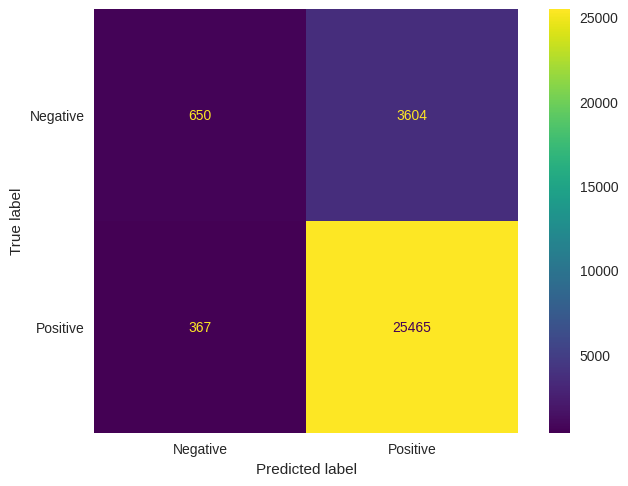

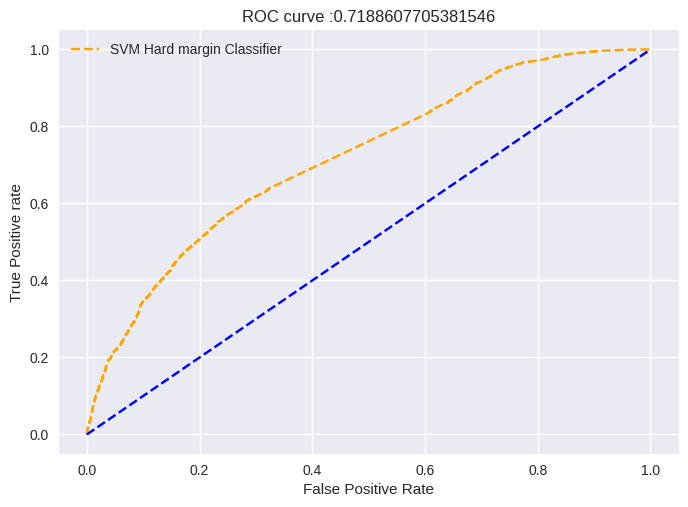

In [ ]:
y_pred_svm = svm_hard_margin.predict(X_test_vec)
createConfusionMatrix(y_test, y_pred_svm)
pred_prob_svm = svm_hard_margin.predict_proba(X_test_vec)
generate_roc_curve(pred_prob_svm, 'SVM Hard margin Classifier')

In [ ]:
# Using PCA data
svm_hard_margin = svm.SVC(kernel='linear', C=10)  # Hard-margin SVM with linear kernel
svm_soft_margin = svm.SVC(kernel='linear', C=0.1)   # Soft-margin SVM with linear kernel
svm_kernel = svm.SVC(kernel='rbf', gamma=0.1, C=1.0)  # SVM with RBF kernel

svm_hard_margin.fit(X_train_pca, y_train)
svm_soft_margin.fit(X_train_pca, y_train)
svm_kernel.fit(X_train_pca, y_train)

# Make predictions on the testing data
hard_margin_score = svm_hard_margin.score(X_test_pca, y_test)
soft_margin_score = svm_soft_margin.score(X_test_pca, y_test)
kernel_score = svm_kernel.score(X_test_pca,y_test)
print("Accuracy of the sentiment classification using the SVM Hard margin Classifier: ", hard_margin_score)
print("Accuracy of the sentiment classification using the SVM Soft margin Classifier: ", soft_margin_score)
print("Accuracy of the sentiment classification using the SVM kernel Classifier: ", kernel_score)

Accuracy of the sentiment classification using the SVM Hard margin Classifier:  0.8566682171572862
Accuracy of the sentiment classification using the SVM Soft margin Classifier:  0.8566682171572862
Accuracy of the sentiment classification using the SVM kernel Classifier:  0.8566682171572862


In [ ]:
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
X_svd_transformed = svd.fit_transform(X_tfid_vectorized.toarray())
print(X_svd_transformed.shape)


(54701, 2)


In [ ]:
X_train_svd, X_test_svd, y_train, y_test= train_test_split(X_svd_transformed, y, train_size=0.45, random_state=2)


In [ ]:
# Using PCA data
svm_hard_margin = svm.SVC(kernel='linear', C=10)  # Hard-margin SVM with linear kernel
svm_soft_margin = svm.SVC(kernel='linear', C=0.1)   # Soft-margin SVM with linear kernel
svm_kernel = svm.SVC(kernel='rbf', gamma=0.1, C=1.0)  # SVM with RBF kernel

svm_hard_margin.fit(X_train_svd, y_train)
svm_soft_margin.fit(X_train_svd, y_train)
svm_kernel.fit(X_train_svd, y_train)

# Make predictions on the testing data
hard_margin_score = svm_hard_margin.score(X_test_svd, y_test)
soft_margin_score = svm_soft_margin.score(X_test_svd, y_test)
kernel_score = svm_kernel.score(X_test_svd,y_test)
print("Accuracy of the sentiment classification using the SVM Hard margin Classifier: ", hard_margin_score)
print("Accuracy of the sentiment classification using the SVM Soft margin Classifier: ", soft_margin_score)
print("Accuracy of the sentiment classification using the SVM kernel Classifier: ", kernel_score)

Accuracy of the sentiment classification using the SVM Hard margin Classifier:  0.8586053313833677
Accuracy of the sentiment classification using the SVM Soft margin Classifier:  0.8586053313833677
Accuracy of the sentiment classification using the SVM kernel Classifier:  0.8586053313833677


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define a grid of C values to search
param_grid = {'C': [0.1, 1, 10, 50, 100, 200, 500]}

# Create an SVC model with linear kernel
model = svm.SVC(kernel='linear')

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Train the model with grid search
grid_search.fit(X_train_vec, y_train)

# Print the best parameters and score
print("Best C value:", grid_search.best_params_['C'])
print("Best score:", grid_search.best_score_)

# Access the best model
best_model = grid_search.best_estimator_
score = best_model.score(X_test_vec, y_test)
print("Accuracy of the sentiment classification using the SVM Hard margin Classifier: ", score)


Best C value: 10
Best score: 0.8664229128580134
Accuracy of the sentiment classification using the SVM Hard margin Classifier:  0.8680116997939241


In [ ]:
results = grid_search.cv_results_
print(results)

{'mean_fit_time': array([  7.09426179,   8.75198617,  18.54649138,  63.81782241,
       115.15229006, 175.91894875, 454.04033136]), 'std_fit_time': array([  0.49315532,   0.57428096,   1.79163869,  10.12918339,
        41.14959444,  39.36008601, 185.38232202]), 'mean_score_time': array([0.86457024, 0.95137973, 1.08441653, 1.19616432, 1.29501863,
       1.2354229 , 1.30752549]), 'std_score_time': array([0.04503877, 0.08814601, 0.12590025, 0.03161817, 0.14705358,
       0.0485577 , 0.10756911]), 'param_C': masked_array(data=[0.1, 1, 10, 50, 100, 200, 500],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 50}, {'C': 100}, {'C': 200}, {'C': 500}], 'split0_test_score': array([0.86390412, 0.86715417, 0.86918546, 0.86938858, 0.86938858,
       0.86938858, 0.86938858]), 'split1_test_score': array([0.86532602, 0.86715417, 0.86451351, 0.86471664, 0.86471664,
       0.86471664, 

   **Exercise 4**: **Implementation using Decision Trees**:  (2 point)

Decision Trees are supervised Machine Learning algorithms that can perform both classification and regression tasks and even multioutput tasks. They can handle complex datasets. As the name shows, it uses a tree-like model to make decisions in order to classify or predict according to the problem. It is an ML algorithm that progressively divides datasets into smaller data groups based on a descriptive feature until it reaches sets that are small enough to be described by some label.

The most important part of a decision tree is its explainability!

The importance of decision tree algorithm is that it has many applications in the real world. For example:

1. In the Healthcare sector: To develop Clinical Decision Analysis tools which allow decision-makers to apply for evidence-based medicine and make objective clinical decisions when faced with complex situations.
2. Virtual Assistants (Chatbots): To develop chatbots that provide information and assistance to customers in any required domain.
3. Retail and Marketing: Sentiment analysis detects the pulse of customer feedback and emotions and allows organizations to learn about customer choices and drives decisions.

**Hint**
Use sklearn's **DecisionTreeClassifier** function

In [ ]:
# YOUR CODE(s) HERE
dt_clfr = DecisionTreeClassifier(max_depth=10, min_samples_split=0.05)
dt_clfr.fit(X_train_vec, y_train)
dtc_score = dt_clfr.score(X_test_vec, y_test)
print("Accuracy of the sentiment classification using the Decision Tree Classifier: ", dtc_score)
dtc_pred = dt_clfr.predict(X_test_vec)
dtc_f1_score = f1_score(y_test, dtc_pred)
print ("F1 Score for sentiment classification using the Decision Tree classifier: ", dtc_f1_score)
# X_train_vec, X_test_vec, y_train, y_test


Accuracy of the sentiment classification using the Decision Tree Classifier:  0.8678122714883999
F1 Score for sentiment classification using the Decision Tree classifier:  0.9277867557605359


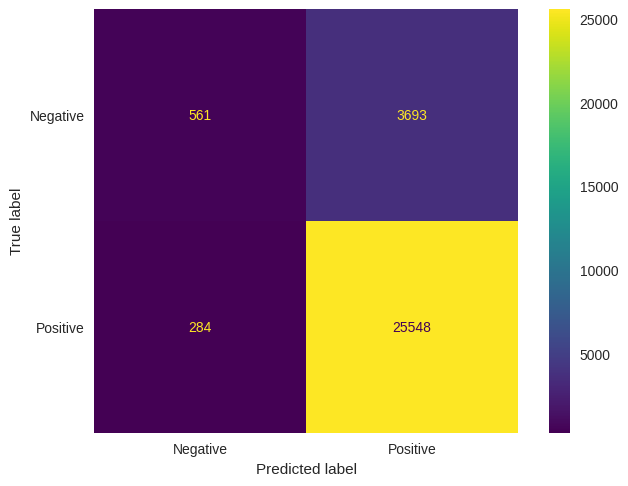

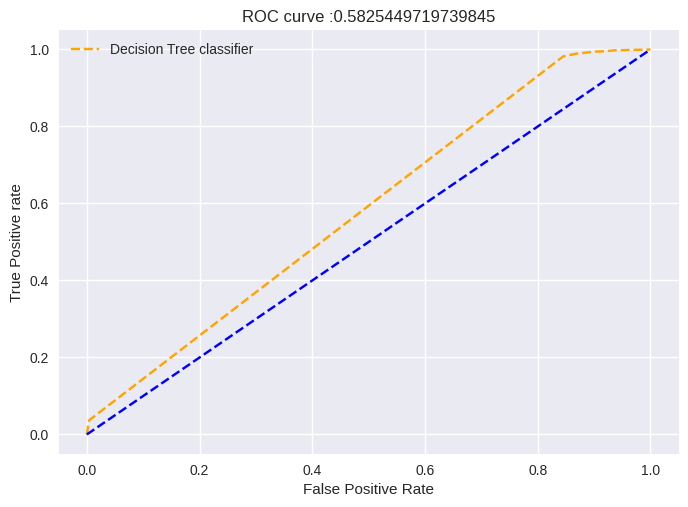

In [ ]:
createConfusionMatrix(y_test, dtc_pred)
pred_prob_dt = dt_clfr.predict_proba(X_test_vec)
generate_roc_curve(pred_prob_dt, 'Decision Tree classifier')

In [ ]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.9 MB/s eta 0:00:00


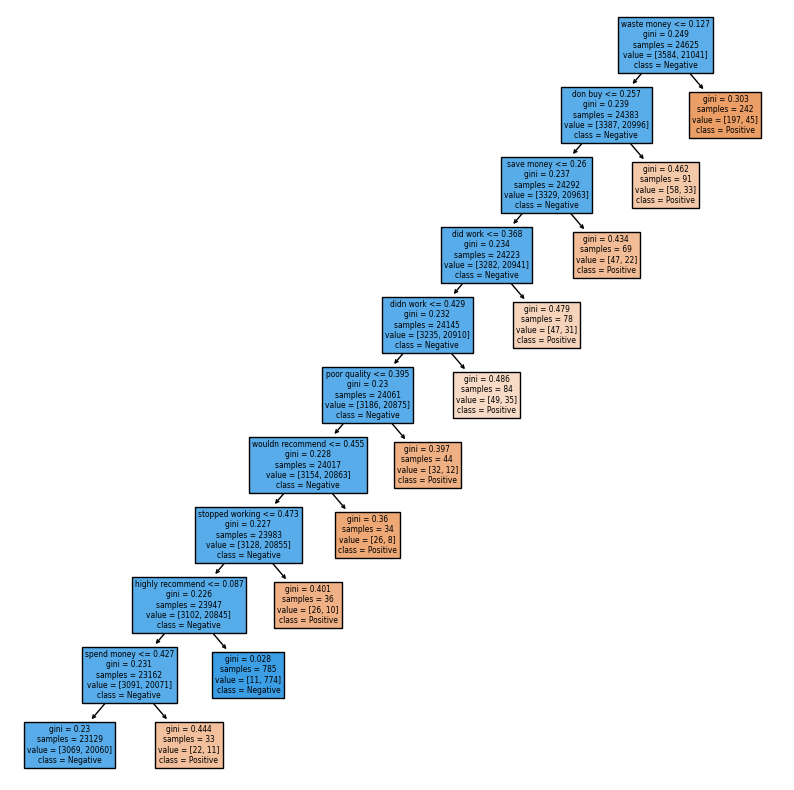

In [ ]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(dt_clfr,
                   feature_names=vectorized_words,
                   class_names=['Positive', 'Negative'],
                   filled=True)

**Exercise 5**: **Implementation using Ensemble Classifier**:  (1 point)
- use LogisticRegression, KNN, SVM, Naive Bayes and VotingClassifier as the weak classifiers

[Hint link VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

In [ ]:
# YOUR CODE(s) HERE
lr_clf = LogisticRegression()
knn_clf= KNeighborsClassifier(n_neighbors=5)
svm_clf= svm.SVC(kernel='linear', C=1, probability=True)
nb_clf = GaussianNB()
estimators = [('lr',lr_clf),('knn',knn_clf),('svm',svm_clf),('nb',nb_clf)]
voting_clf = VotingClassifier(estimators= estimators, voting='soft')
voting_clf.fit(X_train_vec.toarray(), y_train)
voting_score = voting_clf.score(X_test_vec.toarray(), y_test)
print("Accuracy of the sentiment classification using the Voting Ensemble Classifier: ", voting_score)
voting_pred = voting_clf.predict(X_test_vec.toarray())
voting_f1_score = f1_score(y_test, voting_pred)
print ("F1 Score for sentiment classification using the Voting Ensemble Classifier: ", voting_f1_score)
# X_train_pca, y_train, X_test_pca, y_test
# X_train_vec, X_test_vec, y_train, y_test


Accuracy of the sentiment classification using the Voting Ensemble Classifier:  0.8639566575815995
F1 Score for sentiment classification using the Voting Ensemble Classifier:  0.9242556026426337


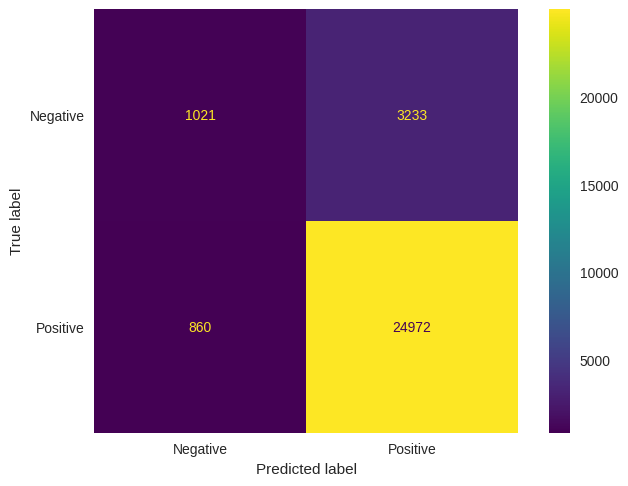

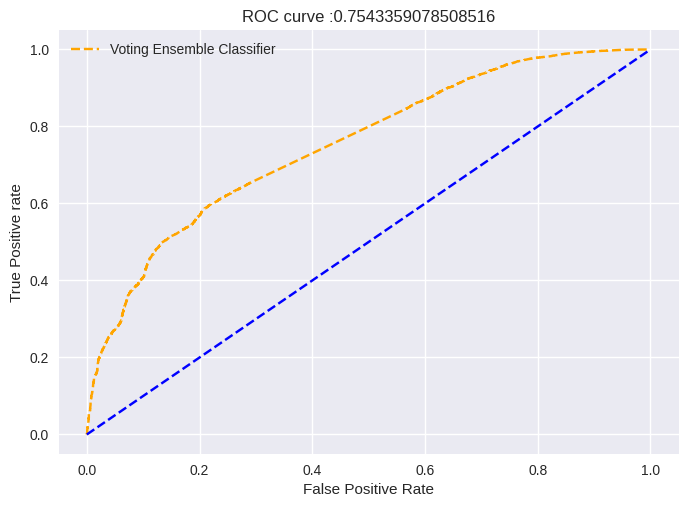

In [ ]:
createConfusionMatrix(y_test, voting_pred)
pred_prob_voting = voting_clf.predict_proba(X_test_vec.toarray())
generate_roc_curve(pred_prob_voting, 'Voting Ensemble Classifier')

In [ ]:
# YOUR CODE(s) HERE
rf_clf = RandomForestClassifier( max_depth=3, max_features='sqrt', min_samples_split=0.05)
rf_clf.fit(X_train_vec, y_train)
rf_score = rf_clf.score(X_test_vec, y_test)
print("Accuracy of the sentiment classification using the Random Forest Classifier: ", rf_score)
rf_pred = rf_clf.predict(X_test_vec)
rf_f1_score = f1_score(rf_pred, y_test)
print("F1 Score for sentiment classification using the Random forest classifier: ", rf_f1_score)

Accuracy of the sentiment classification using the Random Forest Classifier:  0.8586053313833677
F1 Score for sentiment classification using the Random forest classifier:  0.9239243177509925


**Exercise 6**: **Implementation using Clustering**: (2 point)
- k Means Clustering, with and without PCA=2




In [ ]:
# A helper function to help labelling the test predictions
def label(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        unique, count = np.unique(real_labels[idx], return_counts= True)
        print(dict(zip(unique,count)))
        new_label=scipy.stats.mode(real_labels[idx])[0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

kmean_clstr = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=200)
kmean_clstr.fit(X_train_pca)

labelled_clusters = label(2, y_train, kmean_clstr.labels_)
print(labelled_clusters)
training_pred = [labelled_clusters[label] for label in kmean_clstr.labels_]
clstr_score = accuracy_score(y_train, training_pred)
print("Training Accuracy of the sentiment classification using Mini batch Kmeans Clusterring: ", clstr_score)
# clstr_f1_score_training = f1_score(y_train, training_pred)
# print("Training F1 Score for sentiment classification using  Mini batch Kmeans Clusterring: ", clstr_f1_score_training)

# # print("Accuracy of the sentiment classification using Mini batch Kmeans Clusterring: ", clstr_score)
# clstr_pred = kmean_clstr.predict(X_test_vec)
# print(np.unique(clstr_pred))
# clstr_f1_score = f1_score(clstr_pred, y_test)
# print("F1 Score for sentiment classification using  Mini batch Kmeans Clusterring: ", clstr_f1_score)

# X_train_vec, X_test_vec, y_train, y_test
# X_train_pca, y_train, X_test_pca, y_test



{0: 3298, 1: 18960}
{0: 260, 1: 2097}
[array([1]), array([1])]
Training Accuracy of the sentiment classification using Mini batch Kmeans Clusterring:  0.8554539914686167


In [ ]:
kmean_clstr.fit(X_train_vec)

# print(kmean_clstr.get_feature_names_out())
# print("Accuracy of the sentiment classification using Mini batch Kmeans Clusterring: ", clstr_score)
# clstr_pred = kmean_clstr.predict(X_test_pca)
labelled_clusters = label(2, y_train, kmean_clstr.labels_)
print(labelled_clusters)
training_pred = [labelled_clusters[label] for label in kmean_clstr.labels_]
clstr_score = accuracy_score(y_train, training_pred)
print("Training Accuracy of the sentiment classification using Mini batch Kmeans Clusterring: ", clstr_score)

# clstr_f1_score = f1_score(clstr_pred, y_test)
# X_train_vec, X_test_vec, y_train, y_test
# X_train_pca, y_train, X_test_pca, y_test
# print("F1 Score for sentiment classification using  Mini batch Kmeans Clusterring: ", clstr_f1_score)

[array([1]), array([1])]
Training Accuracy of the sentiment classification using Mini batch Kmeans Clusterring:  0.8554539914686167


**Exercise 7**: **Test your own sentence**: (1 point)
- Input your sentences ( One for positive and negative each)
- Print the output sentiment.**Exercise**

In [ ]:
from sklearn.pipeline import Pipeline

myReviews = ["The product is durable and high quality", "I had bad experience total waste of money"];

my_X = tfid_vectorizer.transform(myReviews)
pred = logistic_regression.predict(my_X)
print(pred)



[1 0]
